# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
from collections import Counter
from utils.textnormalization import TextNormalization
from utils.machinelearning import machine_learning_model, fit_model
from utils.deeplearning import model_compile, model_fit, lstm_, gru_, bidirectional_lstm
from utils.plot_model_changes import plot_changes
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
from utils.word_2_vec import word_2_vec_
from utils.confusion_matrix import confusion_matrix_, confusion_matrix_display
from utils.generate_poitive_negative import false_true_positive, false_true_negative
from utils.performance_metrics import accuracy_score, precision_score, sensitivity_score, specificity_score, f1_score, error_rate, performance_metrics_data_frame
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
Corpus = pd.read_excel('original_dataset.xlsx')
Corpus.rename(columns={'rating': 'Sentiment', 'review_description': 'Review'}, inplace=True)
Corpus.drop(columns=['company', 'Unnamed: 0'], inplace=True)
Corpus['Sentiment'] = Corpus['Sentiment'].map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})
Corpus['Review'] = Corpus['Review'].astype(str)
Corpus.tail()

Review Sentiment
67122  كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...   Neutral
67123  أول تجربة مع الخيال العلمي...الكثير من المعلوم...   Neutral
67124  مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...   Neutral
67125  الرسائل بين وائل و شوق كانت أجمل مافي الرواية....   Neutral
67126  استقبال سيء جدا وعدم الاستعداد للنزلاء . لا شي...   Neutral

In [5]:
Data = pd.read_csv('ArabicData.csv') # This Data Will Be Use For Word2Vec

# Sentiment Information

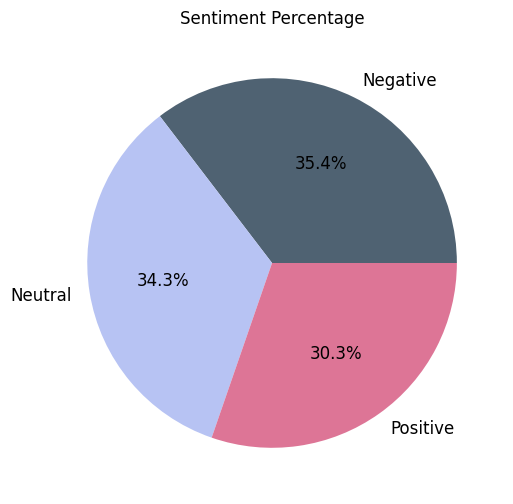

In [6]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

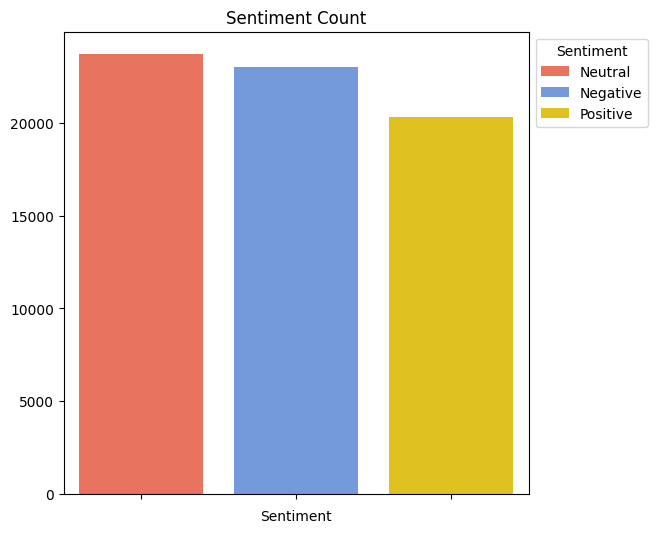

In [7]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [8]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)
Corpus['NumberOfSentences'].sum()

121706

# Average Number Of Sentences

In [9]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

2

# Maximum Number Of Sentences

In [10]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

176

# Minimum Number Of Sentences

In [11]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Number Of Words Before Text Normalization

In [12]:
Corpus["Number of Words 1"] = Corpus["Review"].apply(lambda n:len(word_tokenize(n)))
Corpus["Number of Words 1"].sum()

1681074

# Average Number Of Words Before Text Normalization

In [13]:
AverageNaumberOfWords1 = int(np.round((Corpus["Number of Words 1"].mean())))
AverageNaumberOfWords1

25

# Maximum Number Of Word Before Text Normalization

In [14]:
MaximumNaumberOfWords1 = Corpus["Number of Words 1"].max()
MaximumNaumberOfWords1

1601

# Minimum Number Of Words Before Text Normalization

In [15]:
MimimumNaumberOfWords1 = Corpus["Number of Words 1"].min()
MimimumNaumberOfWords1

1

# Number Of Charachters Before Text Normalization

In [16]:
Corpus["Number of Charachters 1"] = Corpus["Review"].str.len()
Corpus["Number of Charachters 1"].sum()

8724154

# Average Number Of Charachters Before Text Normalization

In [17]:
AverageNumberOfCharachters1 = int(np.round(Corpus["Number of Charachters 1"].mean()))
AverageNumberOfCharachters1

130

# Maximum Number Of Charachters Before Text Normalization

In [18]:
MaximumNumberOfCharachters1 = Corpus['Number of Charachters 1'].max() 
MaximumNumberOfCharachters1

8101

# Minimum Number Of Charachters Before Text Normalization

In [19]:
MinimumNumberOfCharachters1 = Corpus['Number of Charachters 1'].min() 
MinimumNumberOfCharachters1

1

# Most Frequent Words Before Text Normalization

In [20]:
MostFrequentWord1 = Counter((Corpus['Review']).str.split().explode()).most_common(15)
MostFrequentWordDF1 = pd.DataFrame(MostFrequentWord1, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF1

Word  Count
1    من  34709
2    في  31846
3     و  24583
4     .  15871
5   على  12888
6    لا  12888
7   جدا  12579
8    ما  10911
9    ..  10097
10   عن   8739
11   أن   8165
12    ،   7417
13   كل   6766
14  كان   6318
15   ان   6284

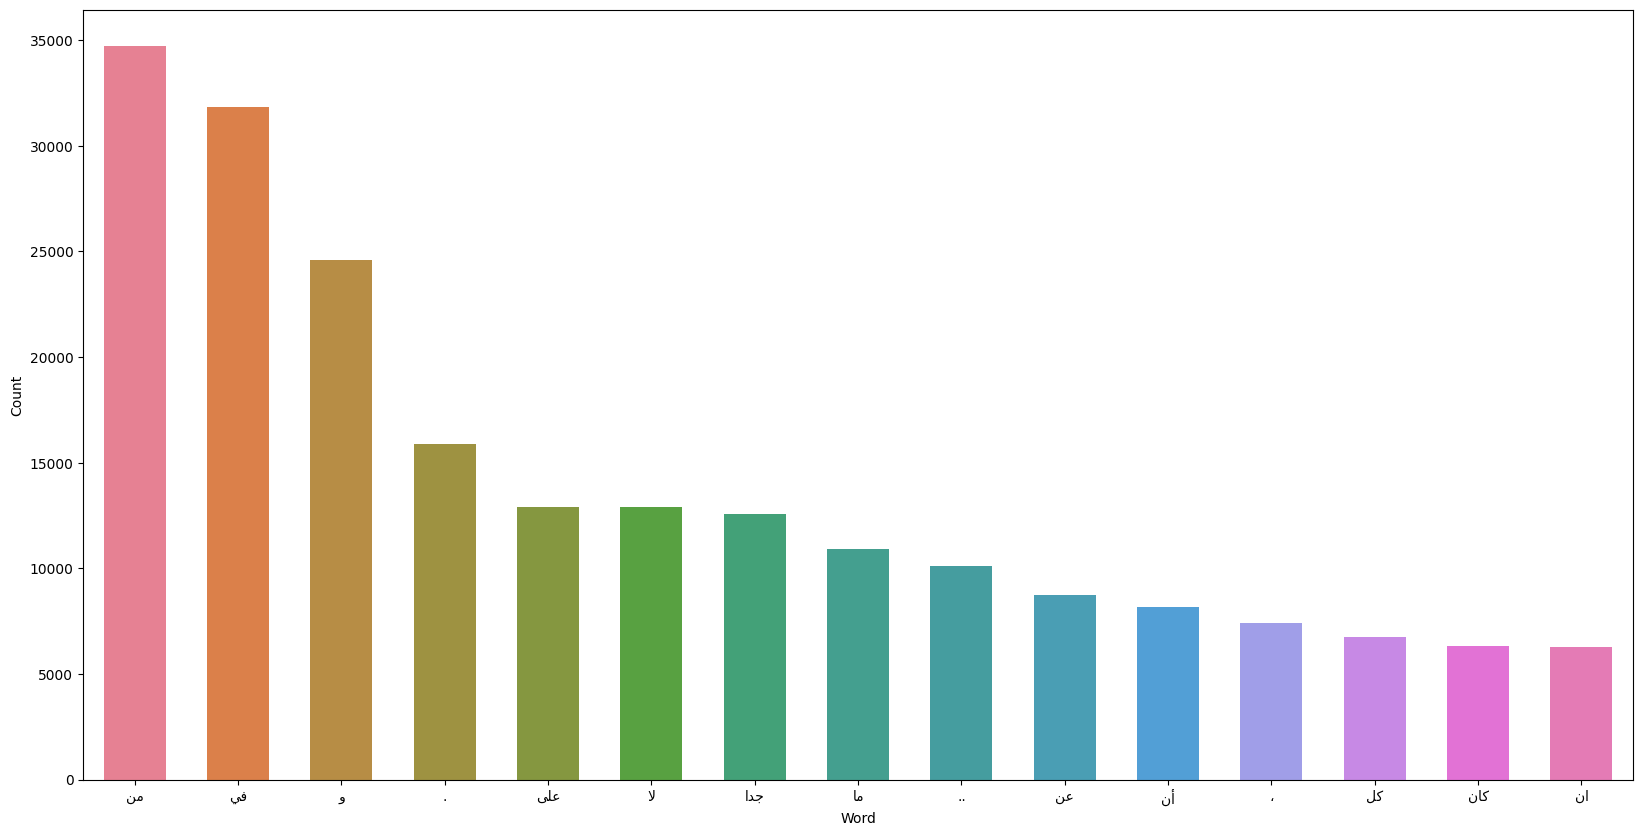

In [21]:
bar_plot(data=MostFrequentWordDF1, text = 'Word', x = 'Word', y='Count')

# Text Normalization

In [22]:
text_normalization = TextNormalization(remove_emojis = True,
                                       remove_hashtags = True,
                                       remove_emails = True,
                                       remove_URLs = True,
                                       remove_new_line_char = True,
                                       remove_mentions = True,
                                       remove_single_char = True,
                                       remove_duplicate_char = True,
                                       remove_duplicate_word = True,
                                       remove_stop_words = True,
                                       remove_special_character = True,
                                       remove_puncuations = True,
                                       remove_html_tags = True,
                                       remove_numbers = True,
                                       remove_non_arabic = True,
                                       remove_arabic_diacritics = True,
                                       normalize_alef_maqsura = True,
                                       normalize_alef = True,
                                       normalize_teh_marbuta = True,
                                       normalize_arabic_tashkeel = True,
                                       normalize_arabic_tatweel = True,
                                       remove_longest_than = True,
                                       remove_whitespace = True,
                                       lemmatize = True,
                                       stemmer = False)

In [23]:
Corpus['Review'] = Corpus['Review'].astype(str)
Corpus['Normalized_Review'] = Corpus['Review'].apply(lambda x: text_normalization.normalization(x))

In [24]:
Corpus.tail(5)

Review Sentiment  \
67122  كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...   Neutral   
67123  أول تجربة مع الخيال العلمي...الكثير من المعلوم...   Neutral   
67124  مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...   Neutral   
67125  الرسائل بين وائل و شوق كانت أجمل مافي الرواية....   Neutral   
67126  استقبال سيء جدا وعدم الاستعداد للنزلاء . لا شي...   Neutral   

       NumberOfSentences  Number of Words 1  Number of Charachters 1  \
67122                  1                 11                       50   
67123                  3                 69                      318   
67124                  3                 17                       81   
67125                  1                 31                      159   
67126                  3                 39                      221   

                                       Normalized_Review  
67122                   كتاب جيد مملا الشيء منتصف الكتاب  
67123  تجربه الخيال العلمي    الكثير المعلومات بقالب ...  
67124  مرضي   الافطار لذيذ   يوجد قائمه طعام الغرفهلم...  
67125  الرسائل وائل شوق اجمل مافي الروايه    مجرد رسا...  
67126  استقبال سيء وعدم الاستعداد للنزلاء   الاستعداد...

In [25]:
Corpus.dropna(axis=1, inplace=True)

# Number Of Unique Words

In [26]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

133658

# WordCloud

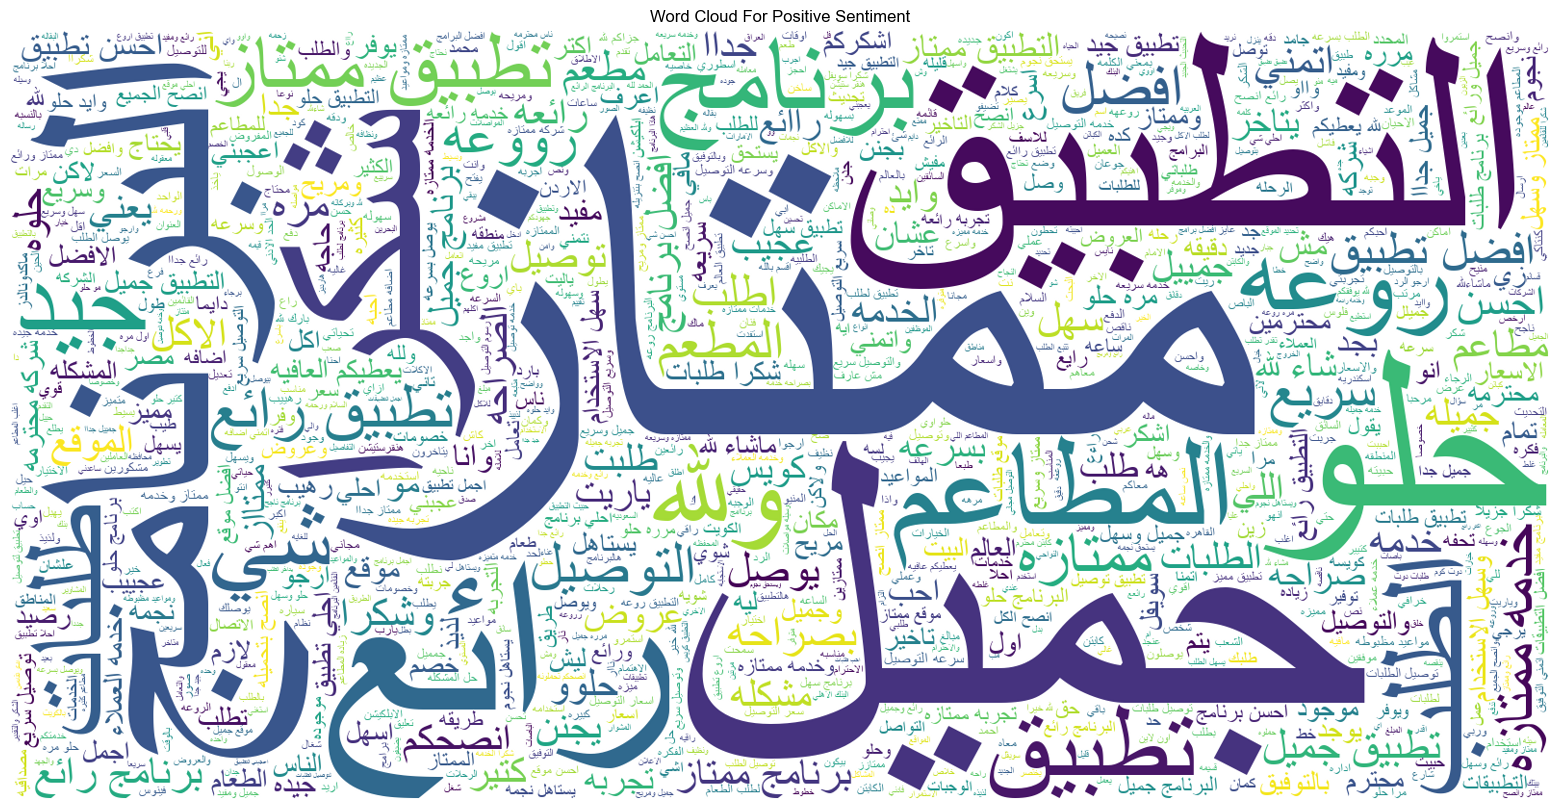

In [27]:
wordcloud(data=Corpus, target='Positive', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

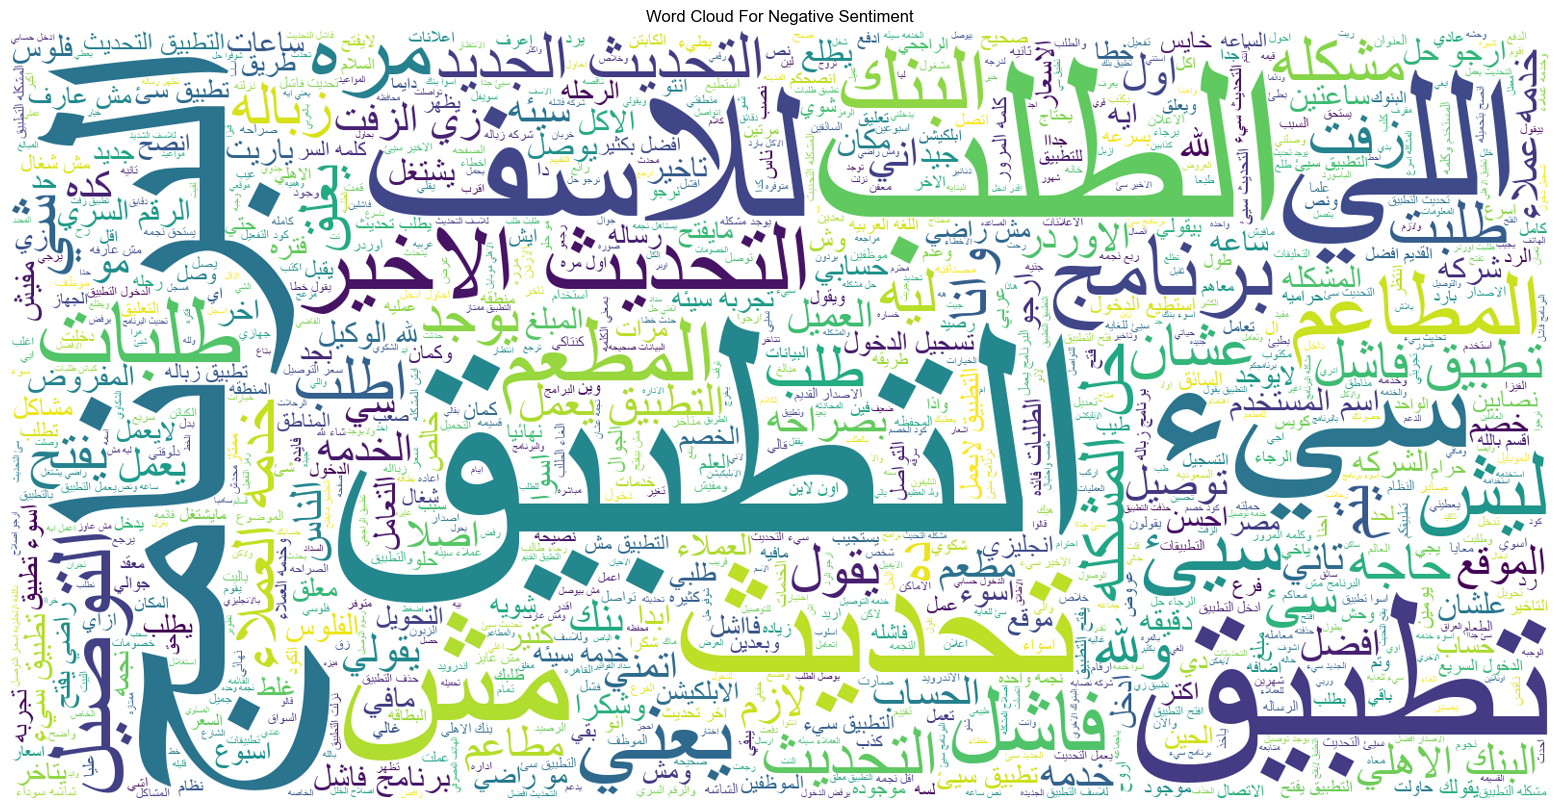

In [28]:
wordcloud(data=Corpus, target='Negative', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

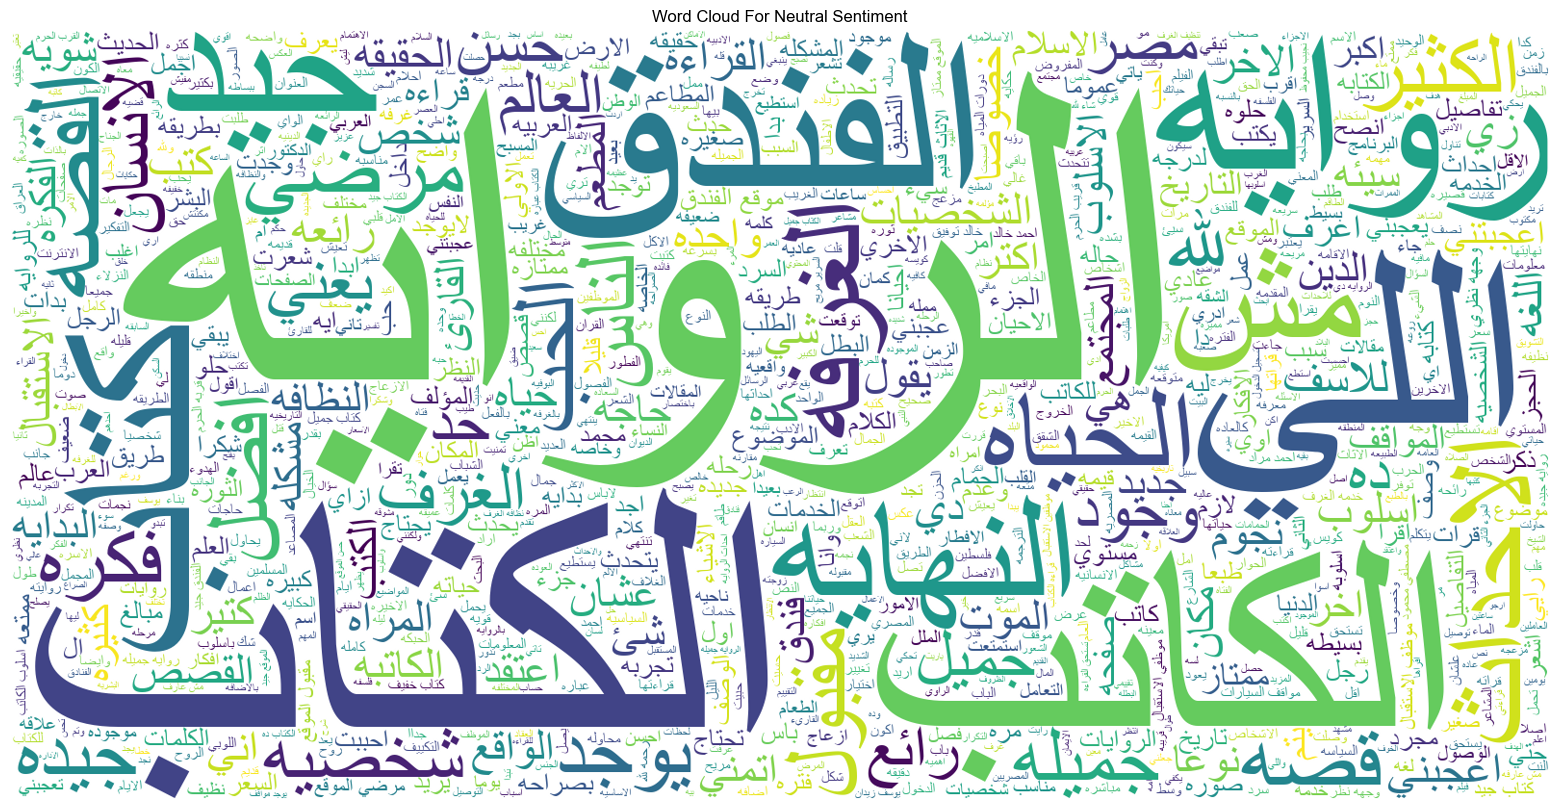

In [29]:
wordcloud(data=Corpus, target='Neutral', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

# Number Of Words After Text Normalization

In [30]:
Corpus["Number of Words 2"] = Corpus["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Corpus.drop(Corpus[Corpus["Number of Words 2"] == 0].index, inplace = True)
Corpus["Number of Words 2"].sum()

1041669

# Average Number Of Words After Text Normalization

In [31]:
AverageNaumberOfWords2 = int(np.round((Corpus["Number of Words 2"].mean())))
AverageNaumberOfWords2

16

# Maximum Number Of Word After Text Normalization

In [32]:
MaximumNaumberOfWords2 = Corpus["Number of Words 2"].max()
MaximumNaumberOfWords2

921

# Minimum Number Of Words After Text Normalization

In [33]:
MimimumNaumberOfWords2 = Corpus["Number of Words 2"].min()
MimimumNaumberOfWords2

1

# Number Of Charachters After Text Normalization

In [34]:
Corpus["Number of Charachters 2"] = Corpus["Normalized_Review"].str.len()
Corpus["Number of Charachters 2"].sum()

6576216

# Average Number Of Charachters After Text Normalization

In [35]:
AverageNumberOfCharachters2 = int(np.round(Corpus["Number of Charachters 2"].mean()))
AverageNumberOfCharachters2

101

# Maximum Number Of Charachters After Text Normalization

In [36]:
MaximumNumberOfCharachters2 = Corpus['Number of Charachters 2'].max() 
MaximumNumberOfCharachters2

6219

# Minimum Number Of Charachters After Text Normalization

In [37]:
MinimumNumberOfCharachters2 = Corpus['Number of Charachters 2'].min() 
MinimumNumberOfCharachters2

1

# Most Frequent Words After Text Normalization

In [38]:
MostFrequentWord2 = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF2 = pd.DataFrame(MostFrequentWord2, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF2

Word  Count
1    التطبيق   5888
2    الروايه   5718
3     الكتاب   5512
4      تطبيق   4665
5         مش   3776
6      ممتاز   3470
7     الفندق   3370
8       الله   3332
9       اللي   3276
10  البرنامج   3103
11       جيد   3077
12      خدمه   2811
13      جميل   2800
14    الكاتب   2642
15    برنامج   2606

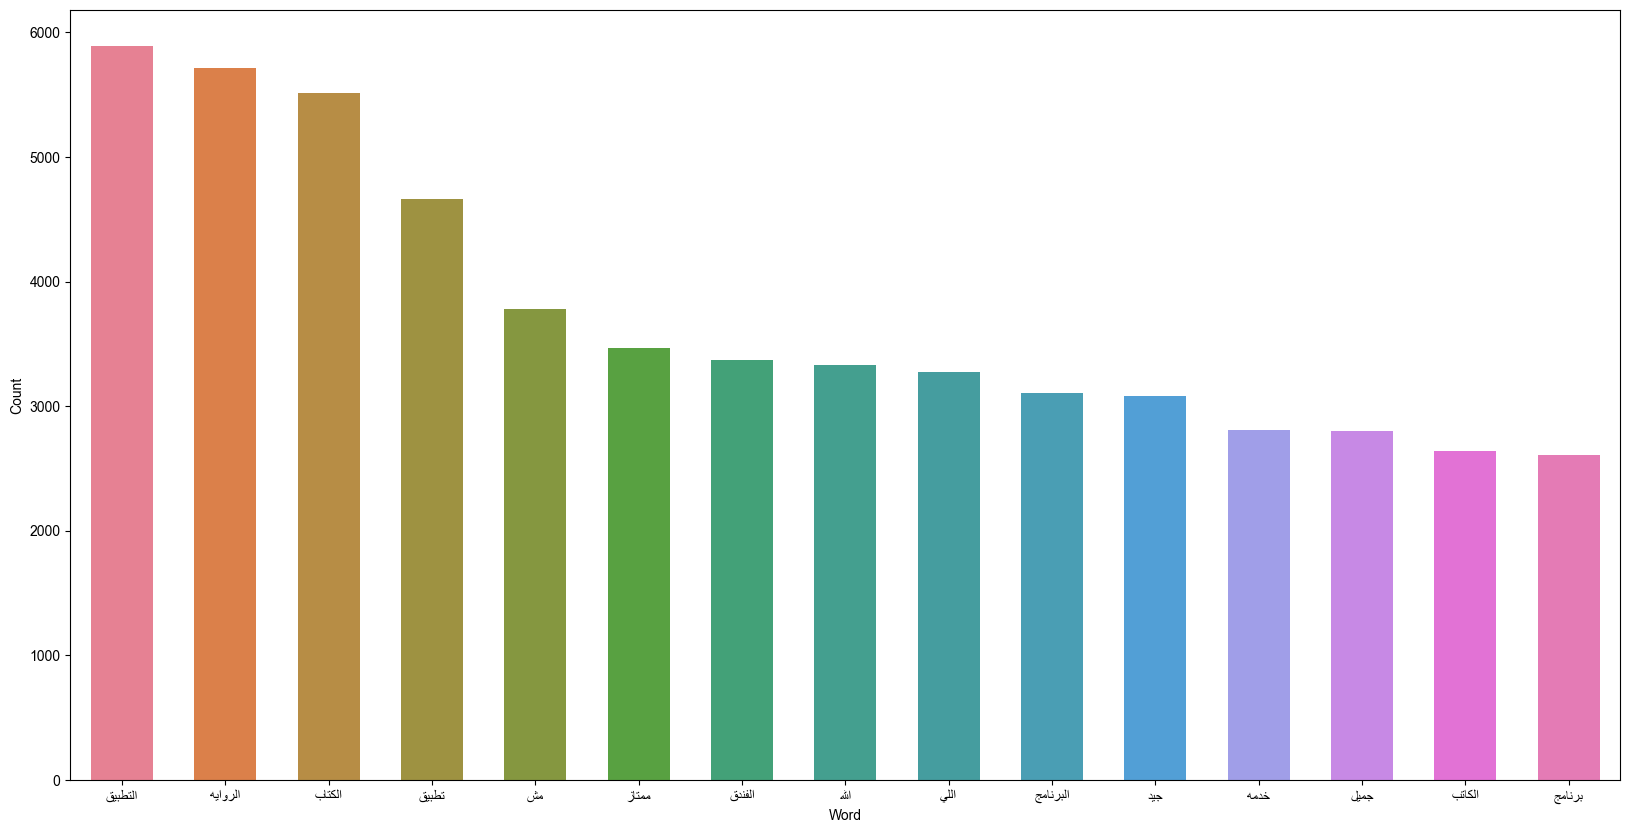

In [39]:
bar_plot(data=MostFrequentWordDF2, text = 'Word', x = 'Word', y='Count')

# Split The Dataset Into X And y

In [40]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']
le = LabelEncoder()
y = le.fit_transform(y)

# Split The Dataset Into Training And Testing

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

# Vectorizer

In [42]:
Vectorizer = TfidfVectorizer()
X_train_Vec = Vectorizer.fit_transform(X_train)
X_test_Vec = Vectorizer.transform(X_test)

# Word Index

In [43]:
Word_index = Vectorizer.vocabulary_
Word_index_ =pd.DataFrame(sorted((list(Word_index.items()))), columns=['Word', 'Index'])
Word_index_.tail()

Word   Index
118193  یستطیع  118193
118194    یعنی  118194
118195    یوجد  118195
118196    یەکی  118196
118197     ےیک  118197

# Machine Learning

**1-Naive Bayes**

In [44]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_Vec, y_train=y_train)

MultinomialNB(alpha=1)

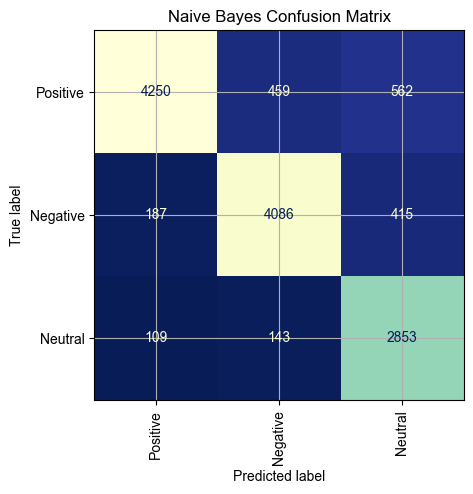

In [45]:
y_predNB = Naive_Bayes.predict(X_test_Vec)
ConfusionMatrixNB = confusion_matrix_(y_test = y_test, y_pred = y_predNB)
confusion_matrix_display(confusionmatrix = ConfusionMatrixNB, name = 'Naive Bayes')

In [46]:
False_PositiveNB, True_PositiveNB = false_true_positive(Confusin_Matrix = ConfusionMatrixNB)
False_NegativeNB, True_NegativeNB = false_true_negative(Confusin_Matrix = ConfusionMatrixNB)

In [47]:
AccuracyNB = accuracy_score(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)
PrecisionNB= precision_score(True_Positive = True_PositiveNB, False_Positive= False_PositiveNB)

SensitivityNB = sensitivity_score(True_Positive = True_PositiveNB,  False_Negative = False_NegativeNB)
SpecificityNB = specificity_score(True_Negative = True_NegativeNB, False_Positive = False_PositiveNB)

F1ScoreNB = f1_score(True_Positive = True_PositiveNB, False_Negative = False_NegativeNB, False_Positive = False_PositiveNB)
ErrorNB = error_rate(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)

In [48]:
performance_metrics_data_frame(Accuracy = AccuracyNB, Precision = PrecisionNB, Sensitivity = SensitivityNB, Specificity = SpecificityNB, F1Score = F1ScoreNB, Error = ErrorNB)

Values
Accuracy     0.904317
Precision    0.856476
Sensitivity  0.856476
Specificity  0.928238
F1Score      0.856476
Error        0.095683

**2-Logistic Regression**

In [49]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_Vec, y_train=y_train)


LogisticRegression()

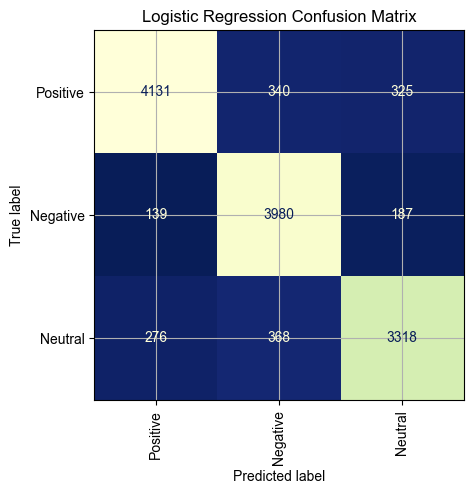

In [50]:
y_predLR = Logistic_Regression.predict(X_test_Vec)
ConfusionMatrixLR = confusion_matrix_(y_test = y_test, y_pred = y_predLR)
confusion_matrix_display(confusionmatrix = ConfusionMatrixLR, name = 'Logistic Regression')

In [51]:
False_PositiveLR, True_PositiveLR = false_true_positive(Confusin_Matrix = ConfusionMatrixLR)
False_NegativeLR, True_NegativeLR = false_true_negative(Confusin_Matrix = ConfusionMatrixLR)

In [52]:
AccuracyLR = accuracy_score(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)
PrecisionLR= precision_score(True_Positive = True_PositiveLR, False_Positive= False_PositiveLR)

SensitivityLR = sensitivity_score(True_Positive = True_PositiveLR,  False_Negative = False_NegativeLR)
SpecificityLR = specificity_score(True_Negative = True_NegativeLR, False_Positive = False_PositiveLR)

F1ScoreLR = f1_score(True_Positive = True_PositiveLR, False_Negative = False_NegativeLR, False_Positive = False_PositiveLR)
ErrorLR = error_rate(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)

In [53]:
performance_metrics_data_frame(Accuracy = AccuracyLR, Precision = PrecisionLR, Sensitivity = SensitivityLR, Specificity = SpecificityLR, F1Score = F1ScoreLR, Error = ErrorLR)

Values
Accuracy     0.916565
Precision    0.874847
Sensitivity  0.874847
Specificity  0.937423
F1Score      0.874847
Error        0.083435

**3-Decision Tree**

In [54]:
Algorithm = DecisionTreeClassifier(criterion='gini')
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_Vec, y_train=y_train)

DecisionTreeClassifier()

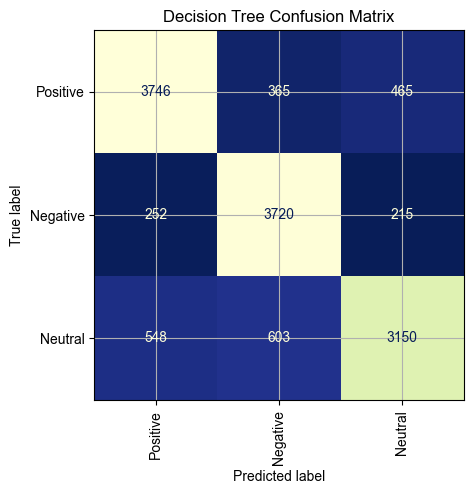

In [55]:
y_predDT = Decision_Tree.predict(X_test_Vec)
ConfusionMatrixDT = confusion_matrix_(y_test = y_test, y_pred = y_predDT)
confusion_matrix_display(confusionmatrix = ConfusionMatrixDT, name = 'Decision Tree')

In [56]:
False_PositiveDT, True_PositiveDT = false_true_positive(Confusin_Matrix = ConfusionMatrixDT)
False_NegativeDT, True_NegativeDT = false_true_negative(Confusin_Matrix = ConfusionMatrixDT)

In [57]:
AccuracyDT = accuracy_score(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)
PrecisionDT= precision_score(True_Positive = True_PositiveDT, False_Positive =False_PositiveDT)

SensitivityDT = sensitivity_score(True_Positive = True_PositiveDT,  False_Negative = False_NegativeDT)
SpecificityDT = specificity_score(True_Negative = True_NegativeDT, False_Positive = False_PositiveDT)

F1ScoreDT = f1_score(True_Positive = True_PositiveDT, False_Negative = False_NegativeDT, False_Positive = False_PositiveDT)
ErrorDT = error_rate(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)

In [58]:
performance_metrics_data_frame(Accuracy = AccuracyDT, Precision = PrecisionDT, Sensitivity = SensitivityDT, Specificity = SpecificityDT, F1Score = F1ScoreDT, Error = ErrorDT)

Values
Accuracy     0.875077
Precision    0.812615
Sensitivity  0.812615
Specificity  0.906307
F1Score      0.812615
Error        0.124923

**4-K Nearest Neighbors**

In [59]:
Algorithm =KNeighborsClassifier(metric='cosine', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_Vec, y_train=y_train)

KNeighborsClassifier(metric='cosine')

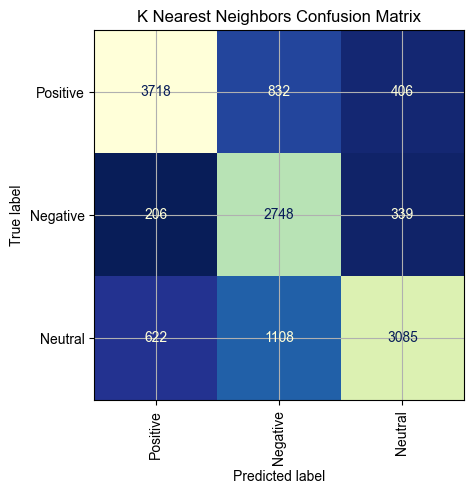

In [60]:
y_predKNN = K_Nearest_Neighbors.predict(X_test_Vec)
ConfusionMatrixKNN = confusion_matrix_(y_test = y_test, y_pred = y_predKNN)
confusion_matrix_display(confusionmatrix = ConfusionMatrixKNN, name = 'K Nearest Neighbors')

In [61]:
False_PositiveKNN, True_PositiveKNN = false_true_positive(Confusin_Matrix = ConfusionMatrixKNN)
False_NegativeKNN, True_NegativeKNN = false_true_negative(Confusin_Matrix = ConfusionMatrixKNN)

In [62]:
AccuracyKNN = accuracy_score(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)
PrecisionKNN= precision_score(True_Positive = True_PositiveKNN, False_Positive =False_PositiveKNN)

SensitivityKNN = sensitivity_score(True_Positive = True_PositiveKNN,  False_Negative = False_NegativeKNN)
SpecificityKNN = specificity_score(True_Negative = True_NegativeKNN, False_Positive = False_PositiveKNN)

F1ScoreKNN = f1_score(True_Positive = True_PositiveKNN, False_Negative = False_NegativeKNN, False_Positive = False_PositiveKNN)
ErrorKNN = error_rate(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)

In [63]:
performance_metrics_data_frame(Accuracy = AccuracyKNN, Precision = PrecisionKNN, Sensitivity = SensitivityKNN, Specificity = SpecificityKNN, F1Score = F1ScoreKNN, Error = ErrorKNN)

Values
Accuracy     0.820729
Precision    0.731093
Sensitivity  0.731093
Specificity  0.865547
F1Score      0.731093
Error        0.179271

**5-Random Forest**

In [64]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_Vec, y_train=y_train)

RandomForestClassifier(criterion='entropy')

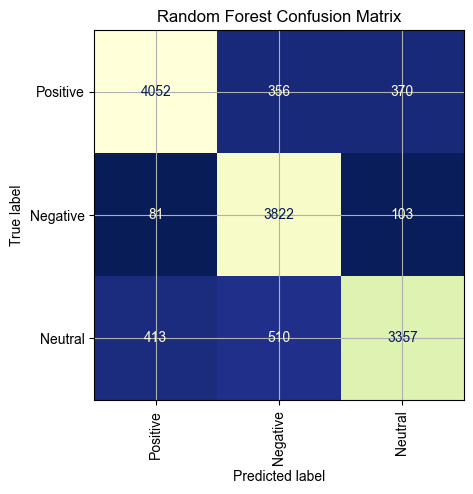

In [65]:
y_predRF = Random_Forest.predict(X_test_Vec)
ConfusionMatrixRF = confusion_matrix_(y_test = y_test, y_pred = y_predRF)
confusion_matrix_display(confusionmatrix = ConfusionMatrixRF, name = 'Random Forest')

In [66]:
False_PositiveRF, True_PositiveRF = false_true_positive(Confusin_Matrix = ConfusionMatrixRF)
False_NegativeRF, True_NegativeRF = false_true_negative(Confusin_Matrix = ConfusionMatrixRF)

In [67]:
AccuracyRF = accuracy_score(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)
PrecisionRF= precision_score(True_Positive = True_PositiveRF, False_Positive =False_PositiveRF)

SensitivityRF = sensitivity_score(True_Positive = True_PositiveRF,  False_Negative = False_NegativeRF)
SpecificityRF = specificity_score(True_Negative = True_NegativeRF, False_Positive = False_PositiveRF)

F1ScoreRF = f1_score(True_Positive = True_PositiveRF, False_Negative = False_NegativeRF, False_Positive = False_PositiveRF)
ErrorRF = error_rate(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)

In [68]:
performance_metrics_data_frame(Accuracy = AccuracyRF, Precision = PrecisionRF, Sensitivity = SensitivityRF, Specificity = SpecificityRF, F1Score = F1ScoreRF, Error = ErrorRF)

Values
Accuracy     0.906461
Precision    0.859691
Sensitivity  0.859691
Specificity  0.929845
F1Score      0.859691
Error        0.093539

**6-SGD Classifier**

In [69]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_Vec, y_train=y_train)

SGDClassifier()

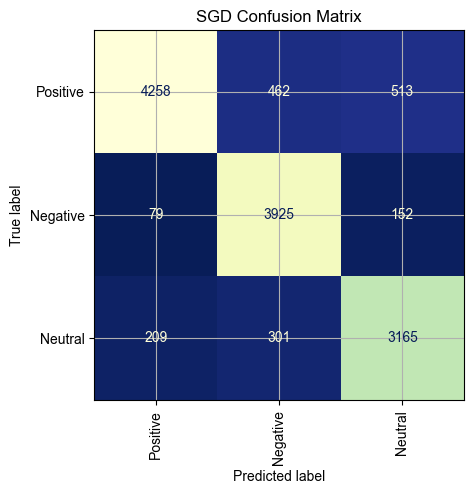

In [70]:
y_predSGD = SGD.predict(X_test_Vec)
ConfusionMatrixSGD = confusion_matrix_(y_test = y_test, y_pred = y_predSGD)
confusion_matrix_display(confusionmatrix = ConfusionMatrixSGD, name = 'SGD')

In [71]:
False_PositiveSGD, True_PositiveSGD = false_true_positive(Confusin_Matrix = ConfusionMatrixSGD)
False_NegativeSGD, True_NegativeSGD = false_true_negative(Confusin_Matrix = ConfusionMatrixSGD)

In [72]:
AccuracySGD = accuracy_score(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)
PrecisionSGD= precision_score(True_Positive = True_PositiveSGD, False_Positive =False_PositiveSGD)

SensitivitySGD = sensitivity_score(True_Positive = True_PositiveSGD,  False_Negative = False_NegativeSGD)
SpecificitySGD = specificity_score(True_Negative = True_NegativeSGD, False_Positive = False_PositiveSGD)

F1ScoreSGD = f1_score(True_Positive = True_PositiveSGD, False_Negative = False_NegativeSGD, False_Positive = False_PositiveSGD)
ErrorSGD = error_rate(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)

In [73]:
performance_metrics_data_frame(Accuracy = AccuracySGD, Precision = PrecisionSGD, Sensitivity = SensitivitySGD, Specificity = SpecificitySGD, F1Score = F1ScoreSGD, Error = ErrorSGD)

Values
Accuracy     0.912431
Precision    0.868647
Sensitivity  0.868647
Specificity  0.934323
F1Score      0.868647
Error        0.087569

**7-SVM**

In [74]:
Algorithm = SVC(kernel='linear')
SVM = machine_learning_model(algorithm=Algorithm)
fit_model(model=SVM, X_train=X_train_Vec, y_train=y_train)

SVC(kernel='linear')

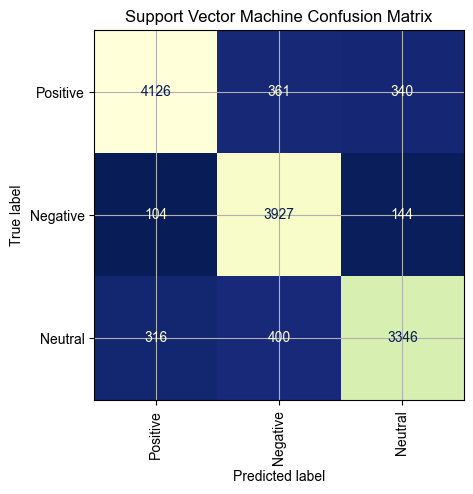

In [75]:
y_predSVM = SVM.predict(X_test_Vec)
ConfusionMatrixSVM = confusion_matrix_(y_test = y_test, y_pred = y_predSVM)
confusion_matrix_display(confusionmatrix = ConfusionMatrixSVM, name = 'Support Vector Machine')

In [76]:
False_PositiveSVM, True_PositiveSVM = false_true_positive(Confusin_Matrix = ConfusionMatrixSVM)
False_NegativeSVM, True_NegativeSVM = false_true_negative(Confusin_Matrix = ConfusionMatrixSVM)

In [77]:
AccuracySVM = accuracy_score(True_Positive = True_PositiveSVM, True_Negative = True_NegativeSVM, False_Positive =False_PositiveSVM, False_Negative = False_NegativeSVM)
PrecisionSVM= precision_score(True_Positive = True_PositiveSVM, False_Positive =False_PositiveSVM)

SensitivitySVM = sensitivity_score(True_Positive = True_PositiveSVM,  False_Negative = False_NegativeSVM)
SpecificitySVM = specificity_score(True_Negative = True_NegativeSVM, False_Positive = False_PositiveSVM)

F1ScoreSVM = f1_score(True_Positive = True_PositiveSVM, False_Negative = False_NegativeSVM, False_Positive = False_PositiveSVM)
ErrorSVM = error_rate(True_Positive = True_PositiveSVM, True_Negative = True_NegativeSVM, False_Positive =False_PositiveSVM, False_Negative = False_NegativeSVM)

In [78]:
performance_metrics_data_frame(Accuracy = AccuracySVM, Precision = PrecisionSVM, Sensitivity = SensitivitySVM, Specificity = SpecificitySVM, F1Score = F1ScoreSVM, Error = ErrorSVM)

Values
Accuracy     0.915034
Precision    0.872551
Sensitivity  0.872551
Specificity  0.936275
F1Score      0.872551
Error        0.084966

**8-MLPClassifier**

In [79]:
Algorithm = MLPClassifier(activation='relu', hidden_layer_sizes=16)
MLP = machine_learning_model(algorithm=Algorithm)
fit_model(model=MLP, X_train=X_train_Vec, y_train=y_train)

MLPClassifier(hidden_layer_sizes=16)

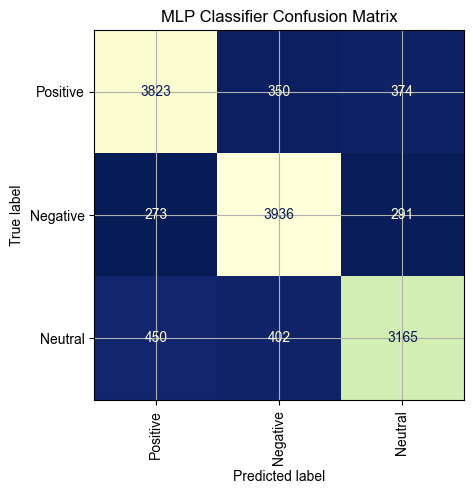

In [80]:
y_predMLP = MLP.predict(X_test_Vec)
ConfusionMatrixMLP = confusion_matrix_(y_test = y_test, y_pred = y_predMLP)
confusion_matrix_display(confusionmatrix = ConfusionMatrixMLP, name = 'MLP Classifier')

In [81]:
False_PositiveMLP, True_PositiveMLP = false_true_positive(Confusin_Matrix = ConfusionMatrixMLP)
False_NegativeMLP, True_NegativeMLP = false_true_negative(Confusin_Matrix = ConfusionMatrixMLP)

In [82]:
AccuracyMLP = accuracy_score(True_Positive = True_PositiveMLP, True_Negative = True_NegativeMLP, False_Positive =False_PositiveMLP, False_Negative = False_NegativeMLP)
PrecisionMLP= precision_score(True_Positive = True_PositiveMLP, False_Positive =False_PositiveMLP)

SensitivityMLP = sensitivity_score(True_Positive = True_PositiveMLP,  False_Negative = False_NegativeMLP)
SpecificityMLP = specificity_score(True_Negative = True_NegativeMLP, False_Positive = False_PositiveMLP)

F1ScoreMLP = f1_score(True_Positive = True_PositiveMLP, False_Negative = False_NegativeMLP, False_Positive = False_PositiveMLP)
ErrorMLP = error_rate(True_Positive = True_PositiveMLP, True_Negative = True_NegativeMLP, False_Positive =False_PositiveMLP, False_Negative = False_NegativeMLP)

In [83]:
performance_metrics_data_frame(Accuracy = AccuracyMLP, Precision = PrecisionMLP, Sensitivity = SensitivityMLP, Specificity = SpecificityMLP, F1Score = F1ScoreMLP, Error = ErrorMLP)

Values
Accuracy     0.890794
Precision    0.836191
Sensitivity  0.836191
Specificity  0.918096
F1Score      0.836191
Error        0.109206

# Build Word2Vec

In [84]:
word_2_vec_(data = Data['Text'], vector_size=100, sg = 1, name = 'ArabicWord2Vec100D')

# Deep Learning

In [85]:
tokenizer, vocab_size, max_length, encoded_X_train , encoded_X_test, encoded_y_train, encoded_y_test= deeplearning_preprcosesing_(X_train=X_train, X_test=X_test,  truncating='pre', padding='pre', y_train_=y_train, y_test_=y_test)
embedding_dim = 100

In [86]:
print('The Vocab Size Is :',vocab_size)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 118237

The Max Length Is : 921


In [87]:
Arabic_Word_2_Vec_100D = './ArabicWord2Vec100D.txt'
embedding_dic = {}
with open(Arabic_Word_2_Vec_100D) as f:
    for line in f:
        values = line.split()
        word = values[0]
        x = np.asarray(values[1:], dtype='float32')
        embedding_dic[word] = x

In [88]:
embedding_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_dic.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [89]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    patience=3
                )

**9-LSTM**

Epoch 1/20
1633/1633 [==============================] - 1160s 709ms/step - loss: 0.5631 - accuracy: 0.7325 - val_loss: 0.3351 - val_accuracy: 0.8393
Epoch 2/20
1633/1633 [==============================] - 1156s 708ms/step - loss: 0.2926 - accuracy: 0.8589 - val_loss: 0.2946 - val_accuracy: 0.8566
Epoch 3/20
1633/1633 [==============================] - 807s 494ms/step - loss: 0.2638 - accuracy: 0.8706 - val_loss: 0.2820 - val_accuracy: 0.8607
Epoch 4/20
1633/1633 [==============================] - 220s 134ms/step - loss: 0.2436 - accuracy: 0.8795 - val_loss: 0.2708 - val_accuracy: 0.8653
Epoch 5/20
1633/1633 [==============================] - 217s 133ms/step - loss: 0.2266 - accuracy: 0.8880 - val_loss: 0.2680 - val_accuracy: 0.8666
Epoch 6/20
1633/1633 [==============================] - 216s 132ms/step - loss: 0.2134 - accuracy: 0.8939 - val_loss: 0.2635 - val_accuracy: 0.8688
Epoch 7/20
1633/1633 [==============================] - 214s 131ms/step - loss: 0.2032 - accuracy: 0.8995 - va

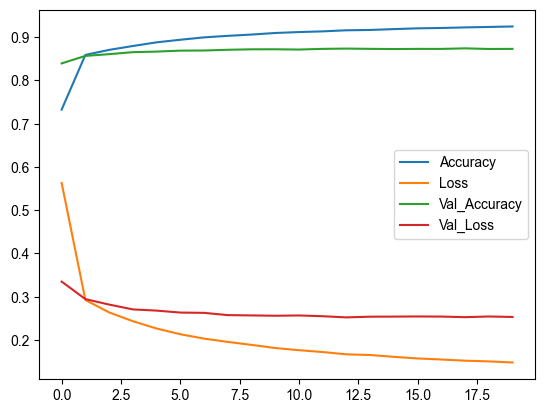

In [90]:
LSTM =lstm_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.5, units1=32, embeddings_matrix = embedding_matrix, units2= 32)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=encoded_y_train, epochs=20, X_test=encoded_X_test, y_test=encoded_y_test, batch_size=32, Callback=Callback)
plot_changes(histoty=history)  

**10-GRU**

Epoch 1/20
1633/1633 [==============================] - 213s 129ms/step - loss: 0.6765 - accuracy: 0.6664 - val_loss: 0.3355 - val_accuracy: 0.8436
Epoch 2/20
1633/1633 [==============================] - 228s 140ms/step - loss: 0.2893 - accuracy: 0.8614 - val_loss: 0.2840 - val_accuracy: 0.8600
Epoch 3/20
1633/1633 [==============================] - 229s 140ms/step - loss: 0.2512 - accuracy: 0.8769 - val_loss: 0.2717 - val_accuracy: 0.8647
Epoch 4/20
1633/1633 [==============================] - 1290s 790ms/step - loss: 0.2344 - accuracy: 0.8841 - val_loss: 0.2719 - val_accuracy: 0.8642
Epoch 5/20
1633/1633 [==============================] - 225s 138ms/step - loss: 0.2189 - accuracy: 0.8917 - val_loss: 0.2619 - val_accuracy: 0.8686
Epoch 6/20
1633/1633 [==============================] - 236s 145ms/step - loss: 0.2085 - accuracy: 0.8966 - val_loss: 0.2603 - val_accuracy: 0.8704
Epoch 7/20
1633/1633 [==============================] - 250s 153ms/step - loss: 0.1969 - accuracy: 0.9025 - val

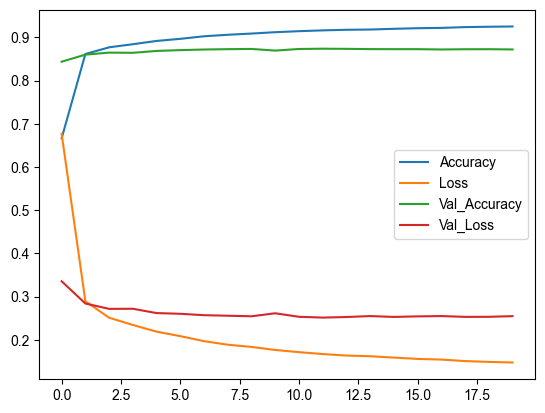

In [91]:
GRU_=gru_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.5, units1=32, embeddings_matrix = embedding_matrix, units2 = 32)
model_compile(model=GRU_)
history = model_fit(model=GRU_, X_train=encoded_X_train, y_train=encoded_y_train, epochs=20, X_test=encoded_X_test, y_test=encoded_y_test, batch_size=32, Callback=Callback)
plot_changes(histoty=history)

**11-Bidirectional LSTM** 

Epoch 1/20
1633/1633 [==============================] - 485s 290ms/step - loss: 0.4933 - accuracy: 0.7771 - val_loss: 0.3213 - val_accuracy: 0.8450
Epoch 2/20
1633/1633 [==============================] - 407s 249ms/step - loss: 0.2844 - accuracy: 0.8623 - val_loss: 0.2974 - val_accuracy: 0.8531
Epoch 3/20
1633/1633 [==============================] - 342s 210ms/step - loss: 0.2564 - accuracy: 0.8737 - val_loss: 0.2829 - val_accuracy: 0.8605
Epoch 4/20
1633/1633 [==============================] - 333s 204ms/step - loss: 0.2379 - accuracy: 0.8828 - val_loss: 0.2740 - val_accuracy: 0.8623
Epoch 5/20
1633/1633 [==============================] - 359s 220ms/step - loss: 0.2225 - accuracy: 0.8896 - val_loss: 0.2671 - val_accuracy: 0.8659
Epoch 6/20
1633/1633 [==============================] - 330s 202ms/step - loss: 0.2104 - accuracy: 0.8955 - val_loss: 0.2661 - val_accuracy: 0.8664
Epoch 7/20
1633/1633 [==============================] - 320s 196ms/step - loss: 0.1997 - accuracy: 0.9013 - val_

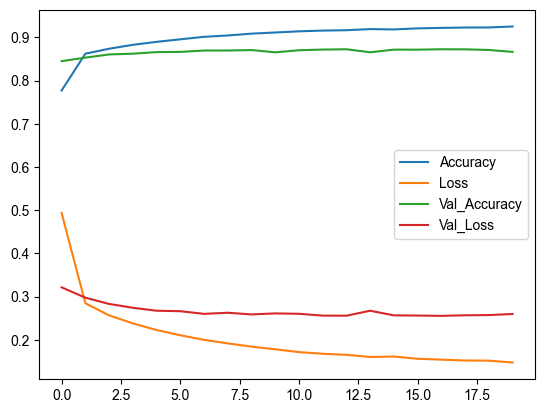

In [92]:
Bidirectional_LSTM=bidirectional_lstm(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.2, units1=32, embeddings_matrix = embedding_matrix, units2 = 32)
model_compile(model=Bidirectional_LSTM)
history = model_fit(model=Bidirectional_LSTM, X_train=encoded_X_train, y_train=encoded_y_train, epochs=20, X_test=encoded_X_test, y_test=encoded_y_test, batch_size=32, Callback=Callback)
plot_changes(histoty=history) 